Las técnicas de clustering, también conocidas como técnicas de agrupamiento, son un conjunto de métodos de aprendizaje **no supervisado** que se utilizan para identificar patrones naturales o estructuras ocultas en conjuntos de datos. La idea principal detrás del *clustering* es agrupar elementos similares en conjuntos o clústeres y separar elementos diferentes en clústeres diferentes. Estas técnicas son útiles para una variedad de aplicaciones en varios sectores debido a su capacidad para descubrir relaciones intrínsecas en los datos. Aquí te explico en qué consisten y cómo se utilizan, junto con un ejemplo real en un sector específico:

1. **K-Means:** El algoritmo K-Means es uno de los métodos de clustering más populares y el que aprenderemos en esta lección. Agrupa los datos en un número predefinido de clústeres (k) según la distancia entre los puntos de datos. Los datos se asignan al clúster cuyo centroide (punto central) está más cerca de ellos. Es especialmente útil cuando se necesita segmentar datos en grupos de manera equitativa y rápida.

   **Ejemplo:** Se utiliza en marketing para segmentar a los clientes en grupos con intereses similares. Esto permite dirigir campañas de marketing específicas a cada segmento y mejorar la personalización de los mensajes.

2. **Agrupamiento jerárquico:** Este método crea una jerarquía de clústeres en forma de un árbol. Los datos se agrupan primero en clústeres más pequeños y luego se fusionan gradualmente en clústeres más grandes. Esto permite explorar diferentes niveles de granularidad en los agrupamientos.

   **Ejemplo:** En biología, se puede utilizar el agrupamiento jerárquico para clasificar especies en función de similitudes genéticas. Se obtiene una jerarquía de agrupamientos que muestra cómo las especies se relacionan entre sí en diferentes niveles de similitud.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Este algoritmo se basa en la densidad de puntos en el espacio de datos y agrupa puntos que están cerca unos de otros en regiones densas, separando regiones menos densas. Es efectivo para identificar clústeres de formas arbitrarias y detectar valores atípicos.

   **Ejemplo:** En análisis de datos de tráfico urbano, se utiliza para identificar áreas de congestión en una ciudad. Los puntos de datos representarían vehículos, y el algoritmo identificaría clústeres de vehículos que se mueven lentamente debido a la congestión del tráfico.

4. **Clustering espectral:** Este enfoque utiliza la teoría de grafos y el análisis de matrices para agrupar datos en función de similitudes en la estructura de los datos. Puede ser útil para identificar clústeres en datos de alta dimensionalidad.

   **Ejemplo:** En procesamiento de imágenes, se puede aplicar clustering espectral para segmentar una imagen en regiones con características similares, como en la segmentación de tejidos en imágenes médicas.

Otros ejemplos son: 

Clustering se utiliza ampliamente en el mundo de la ciencia de datos y el análisis de datos para identificar patrones, segmentar datos y tomar decisiones informadas. Aquí tienes algunos ejemplos de la vida real de clustering en el campo de la ciencia de datos:

-  **Recomendaciones de productos:** Las plataformas de comercio electrónico como Amazon y Netflix utilizan algoritmos de clustering para recomendar productos o contenido a los usuarios en función de sus comportamientos y preferencias pasadas. Si un usuario ha comprado ciertos libros o visto películas de cierto género, el sistema puede agruparlo con otros usuarios que tienen patrones de compra o visualización similares y recomendar productos populares en ese grupo.

-  **Detección de fraudes:** En la industria financiera, el clustering se utiliza para detectar transacciones fraudulentas. Los patrones de gasto fraudulentos a menudo son diferentes de los patrones de gasto legítimos, y el clustering puede ayudar a identificar grupos de transacciones sospechosas que requieren una revisión adicional.

- **Análisis de redes sociales:** Las redes sociales utilizan clustering para agrupar a los usuarios en función de sus intereses, conexiones o comportamientos en línea. Esto permite a las plataformas mostrar contenido relevante en el feed de noticias de un usuario y sugerir amigos o conexiones con intereses similares.

-  **Diagnóstico médico:** En medicina, el clustering se utiliza para identificar grupos de pacientes con características médicas similares. Esto puede ser útil para personalizar tratamientos y predecir resultados en función de la similitud de los casos.

- **Segmentación geográfica:** Las empresas de venta al por menor o servicios pueden utilizar clustering para segmentar áreas geográficas en función de patrones de compra o comportamiento del consumidor. Esto puede guiar las estrategias de expansión de negocios y la asignación de recursos.

-  **Optimización de rutas de entrega:** Las empresas de logística utilizan clustering para optimizar las rutas de entrega. Los destinos cercanos se agrupan en rutas eficientes, lo que reduce los costos de transporte y el tiempo de entrega.


In [90]:
# antes de empezar necesitaréis las siguientes librerías
#!pip install yellowbrick
#!pip install data-science-utils==1.7.0

In [91]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler


#from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Calidad de los clusters
# ==============================================================================
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

El conjunto de datos que usaremos para la lección de hoy contiene información sobre clientes  y sus características demográficas y de comportamiento relacionadas con compras o gastos. Aquí está una descripción de las columnas:

1. **Gender (Género):** Esta columna indica el género de cada cliente o individuo. Puede tomar dos valores posibles: "Male" (Hombre) o "Female" (Mujer). Esto se refiere al género de cada persona en el conjunto de datos.

2. **Age (Edad):** Esta columna muestra la edad de cada cliente o individuo en años. Por ejemplo, el primer cliente tiene 19 años, el segundo tiene 21 años, y así sucesivamente.

3. **Annual Income (k$) (Ingreso Anual en miles de dólares):** Esta columna representa el ingreso anual de cada cliente en miles de dólares. Indica cuánto dinero ganan anualmente. Por ejemplo, el primer cliente tiene un ingreso anual de 15,000 dólares, el segundo tiene 15,000 dólares, y así sucesivamente.

4. **Spending Score (1-100) (Puntuación de Gasto, de 1 a 100):** Esta columna muestra una puntuación de gasto que asigna un valor entre 1 y 100 a cada cliente. Esta puntuación podría estar relacionada con el comportamiento de gasto de los clientes, donde un puntaje más alto indica un gasto más alto o un mayor nivel de compra. Por ejemplo, el primer cliente tiene un puntaje de gasto de 39, el segundo tiene un puntaje de 81, y así sucesivamente.


In [92]:
df = pd.read_csv("data/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [93]:
# vamos a hacer una copia del DataFrame ya que vamos a hacerle algunas modificaciones
df_copia = df.copy()
df_copia.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Exploración y Preprocesamiento del dataset

Antes de aplicar un algoritmo de K-Means, es esencial realizar una exploración de datos exhaustiva (EDA, por sus siglas en inglés: Exploratory Data Analysis) y llevar a cabo procesos de limpieza de datos. Estos pasos son críticos para garantizar la calidad de los resultados de tu modelo y asegurarte de que los datos sean adecuados para el algoritmo. Aquí están las razones y las tareas típicas que debes realizar durante el EDA y la limpieza de datos:

**Razones para realizar EDA y limpieza de datos:**

1. **Identificar valores atípicos:** El EDA te permite detectar valores atípicos (outliers) que pueden afectar negativamente el rendimiento del algoritmo de K-Means. Los valores atípicos pueden influir en la ubicación de los centroides y distorsionar los resultados del clustering.

2. **Manejar valores faltantes:** Si tus datos contienen valores faltantes (missing values), debes decidir cómo tratarlos. La presencia de valores faltantes puede afectar la convergencia del algoritmo y la calidad de los clústeres resultantes.

3. **Evaluar la calidad de los datos:** Debes asegurarte de que los datos sean precisos y consistentes. Esto incluye verificar la coherencia de las etiquetas de las categorías y la precisión de las mediciones.

4. **Escalamiento de características:** Para K-Means, es importante que las características tengan escalas similares, ya que el algoritmo se basa en la distancia euclidiana. Realizar la estandarización o normalización de características (por ejemplo, usando la media y la desviación estándar) es una parte importante del preprocesamiento.

5. **Selección de características:** Identificar las características relevantes y eliminar aquellas que no aportan información significativa puede mejorar la eficiencia y la calidad de los clústeres.

**Tareas comunes durante EDA y limpieza de datos:**

1. **Eliminar valores atípicos:** Puedes aplicar técnicas estadísticas para identificar y eliminar valores atípicos o decidir si deben mantenerse según el contexto del problema.

2. **Imputar valores faltantes:** Puedes imputar valores faltantes utilizando métodos como la media, la mediana, la moda o algoritmos de imputación más avanzados, según la naturaleza de los datos.

3. **Codificar variables categóricas:** Si tienes variables categóricas, como etiquetas de texto, debes codificarlas numéricamente. Puedes usar codificación one-hot para variables nominales o codificación de etiquetas para variables ordinales.

4. **Escalado de características:** Estandariza o normaliza las características para que tengan la misma escala. Esto es especialmente importante en K-Means, donde las distancias son fundamentales.

5. **Selección de características:** Si tienes muchas características o algunas no son informativas, considera realizar una selección de características para reducir la dimensionalidad y mejorar la eficiencia del modelo.

6. **Visualización de datos:** Utiliza gráficos y visualizaciones para comprender mejor tus datos y explorar relaciones entre características que puedan influir en la elección de K y en la interpretación de los resultados del clustering.

En resumen, realizar EDA y limpieza de datos es esencial para preparar tus datos antes de aplicar el algoritmo de K-Means. Estos pasos ayudan a garantizar que tus resultados de clustering sean confiables y significativos, y que el algoritmo funcione de manera efectiva con tus datos.

In [94]:
# Chequeamos para ver si hay algún nulo en nuestro *dataframe*
df_copia.duplicated().sum()

0

In [95]:
# Chequeamos si hay algun nulo en el *dataframe*
df_copia.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [96]:
# outliers 
df_num = df_copia.select_dtypes(include = np.number )
df_num.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


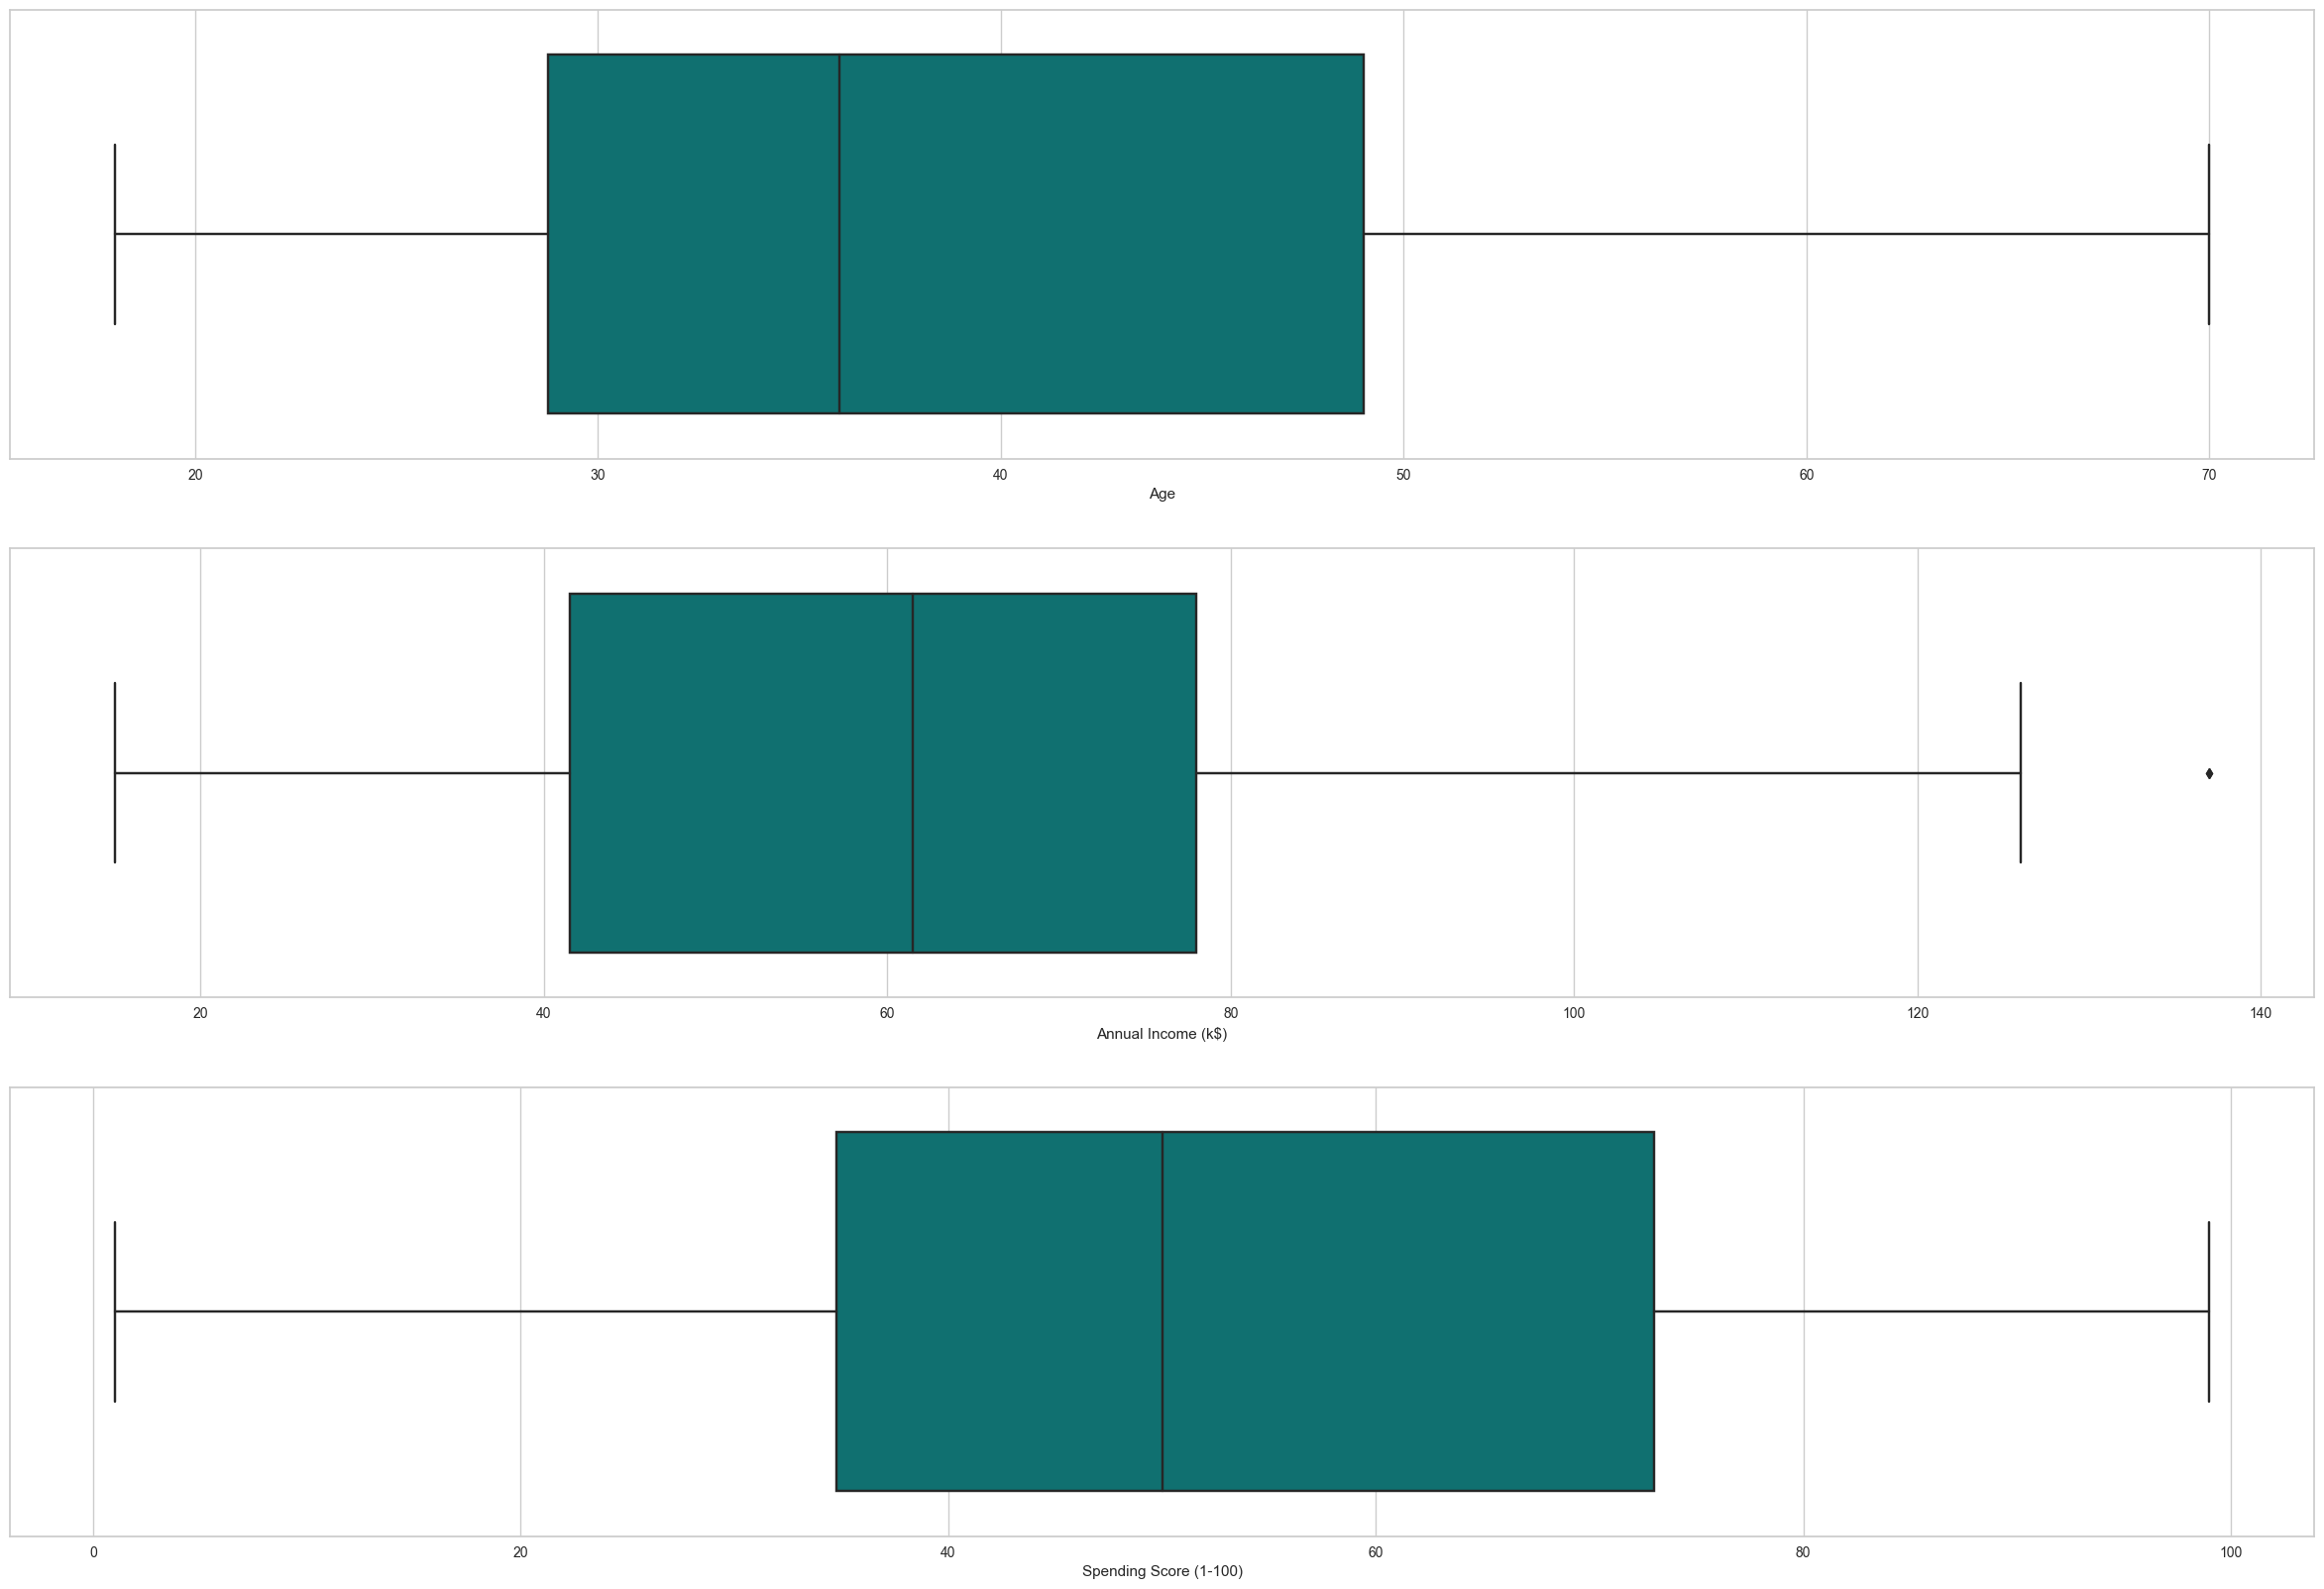

In [97]:
fig, ax = plt.subplots(3, 1, figsize=(30,20))

for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i], color = "teal")
plt.show()

In [98]:
# Estandarización
scaler = StandardScaler()
var_transformadas = scaler.fit_transform(df_num)
df_copia[df_num.columns] = var_transformadas

In [99]:
df_copia.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980


## Encoding

Al igual que en todos los algoritmos que hemos aprendido hasta ahora las columnas de tipo categórico deben ser codificadas, en este caso solo tenemos la columna de `Gender`, y vamos a aplicarle un `get_dummies` asumiendo que son variables que no tienen orden

In [100]:
df_copia = pd.get_dummies(df_copia, columns=["Gender"], prefix=["Gender"])
df_copia.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,-1.424569,-1.738999,-0.434801,0,1
2,-1.281035,-1.738999,1.195704,0,1
3,-1.352802,-1.700830,-1.715913,1,0
4,-1.137502,-1.700830,1.040418,1,0
5,-0.563369,-1.662660,-0.395980,1,0


# K-Means Clustering 

Lo primero que tenemos que hacer es determinar el número de *clusters* que utilizaremos. Podremos usar dos aproximaciones: 

- Usando la `inercia`:  mide lo bien que un conjunto de datos fue agrupado por K-Means. Se calcula midiendo la distancia entre cada punto de datos y su centroide, elevando al cuadrado esta distancia y sumando estos cuadrados en un clúster.

    Un buen modelo es el que tiene una baja inercia y un bajo número de clusters (K). Sin embargo, se trata de un compromiso, ya que a medida que K aumenta, la inercia disminuye.

    Para encontrar la K óptima para un conjunto de datos, utilizaremos el método del codo; el cual encuentra el punto en el que la disminución de la inercia comienza a disminuir.
    

- Usando el `silhouette`:  indica la distancia entre los puntos de datos de un grupo y los de otro grupo. El rango de la puntuación de la silueta es de -1 a 1. La puntuación debe estar más cerca de 1 que de -1.

    - Cuánto más cerca de 1 significa que el *cluster* está bien configurado, es decir, los datos dentro de un *cluster* son muy similares
    
    - Cuánto más cerca de -1 significa que el *cluster* está mal configurado, es decir, los datos dentro del *cluster* son muy diferentes, lo que hace que los puntos estén más separados y, por lo tanto, más cerca estarán los *clusters* 


## Selección número de clusters

### Usando `inercia`

In [101]:
# nos creamos una diccionario vacía para ir almacenando los valores de los scores del modelo
inercia = {}

# nos creamos una variable, que nos servirá para simular distintos números de clusters
clusters = range(1,11)

#iniciamos el for para crear distintos modelos de cluster para sacar los scores de cada uno
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_copia)
    
    inercia[f"{i} cluster"] = kmeans.inertia_
inercia


{'1 cluster': 698.56,
 '2 cluster': 487.6586341571178,
 '3 cluster': 393.6873277811836,
 '4 cluster': 303.28749417840714,
 '5 cluster': 266.18755714107726,
 '6 cluster': 230.75869721145892,
 '7 cluster': 210.58343794977,
 '8 cluster': 187.39720319818585,
 '9 cluster': 168.19350524604272,
 '10 cluster': 149.45812492679784}

In [102]:
# convertimos el diccionario a dataframe

inercias_results = pd.DataFrame(inercia, index = [0]).T.reset_index()
inercias_results.columns = ["num_clus", "inercia"]
inercias_results

,num_clus,inercia
0,1 cluster,698.560000
1,2 cluster,487.658634
2,3 cluster,393.687328
3,4 cluster,303.287494
4,5 cluster,266.187557
5,6 cluster,230.758697
6,7 cluster,210.583438
7,8 cluster,187.397203
8,9 cluster,168.193505
9,10 cluster,149.458125


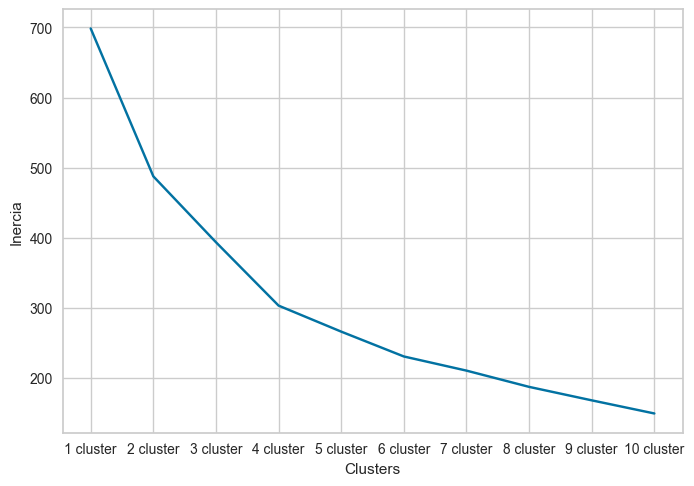

In [103]:
#plotemoas los resultados
sns.lineplot(data=inercias_results, x="num_clus", y="inercia")

#cambiamos las etiquetas de los ejes
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.show();

### Usando silhouette score

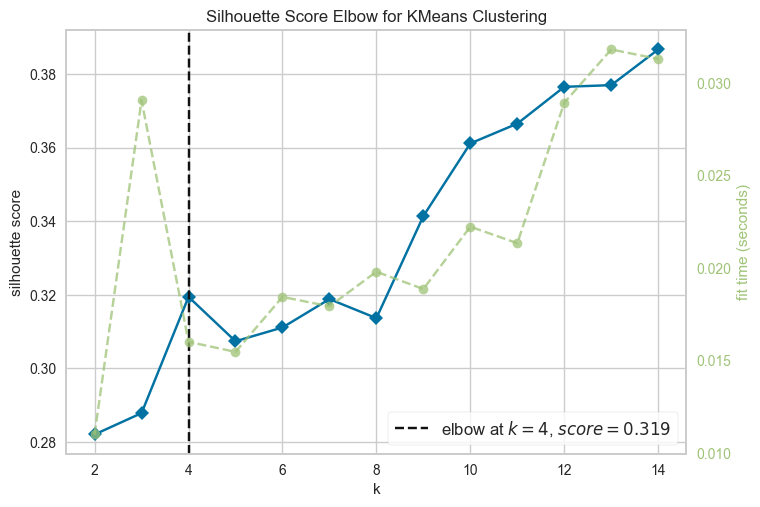

In [104]:
# iniciamos un modelo de Kmean
model = KMeans()

# llamamos al método KElbowVisualizer para que nos calcula el score de silhouette
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

# fiteamos el modelo
visualizer.fit(df_copia)  

# visualizamos los resultados
visualizer.show();

📌 En cualquiera de los casos, **parece que el mejor número de *clusters* es 4**

## Ejecución del modelo

In [105]:
#iniciamos el modelo
kmeans = KMeans(n_clusters=4)

#fitemos el modelo
km_fit = kmeans.fit(df_copia)


Veamos algunas características del modelo: 

In [106]:
# los clusters que se han generado
labels = km_fit.labels_
labels

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [107]:
# los centros de nuestros clusters

centroides = km_fit.cluster_centers_
centroides

array([[-0.42880597,  0.97484722,  1.21608539,  0.55      ,  0.45      ],
       [ 1.06297508, -0.4946758 , -0.37865953,  0.58461538,  0.41538462],
       [-0.96249203, -0.78476346,  0.39202966,  0.59649123,  0.40350877],
       [ 0.0768659 ,  0.9971462 , -1.22042727,  0.47368421,  0.52631579]])

### Calidad del cluster

- `Cardinalidad`: número de puntos por cluster


- `Magnitud`: la suma de las distancias al centroide dentro de cada plot


- `Relación Cardinalidad-Magnitud`: una mayor cardinalidad de los clusters tiende a dar lugar a una mayor magnitud de los mismos, lo que intuitivamente tiene sentido. Los clusters son anómalos cuando la cardinalidad no se correlaciona con la magnitud en relación con los otros clusters.

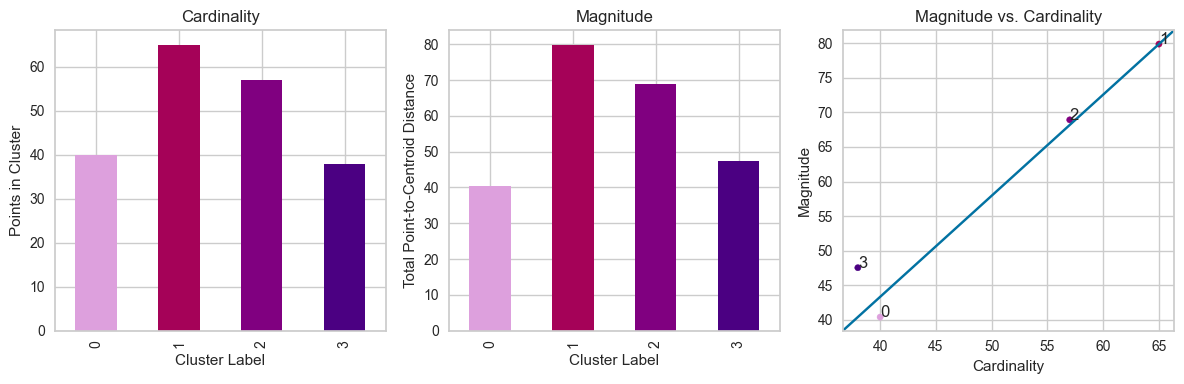

In [108]:
# definimos los colores de las gráficas
cluster_colors = ['plum', 'm', 'purple', 'indigo']

# iniciamos los subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

# ploteamos la CARDINALIDAD
plot_cluster_cardinality(labels, # las labels que predijo nuestro modelo
                         ax=ax1, # sobre que eje lo queremos hacer
                         title="Cardinality", # título de la gráfica
                         color=cluster_colors # colores que vamos a querer usar)
                            )

# ploteamos la MAGNITUD
plot_cluster_magnitude(df_copia, # el dataframe del que sacaremos los datos
                       labels, # las labels que predijo nuestro modelo
                       centroides, # los centroides de nuestros clusters
                       euclidean, # la distancia que quiero usar para medir
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors)

# ploteamos la RELACIÓN ENTRE CARDINALIDAD Y MAGNITUD
plot_magnitude_vs_cardinality(df_copia,# el dataframe del que sacaremos los datos
                              labels, # las labels que predijo nuestro modelo
                              centroides, # los centroides de nuestros clusters
                              euclidean,# la distancia
                              color=cluster_colors,
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")
plt.tight_layout()
plt.show()

### Entendiendo los clusters

In [109]:
# añadimos una nueva columna al DataFrame con las labels que se han creado previamente con el modelo de KMeans, FIJAOS QUE LO AÑADIMOS AL ORIGINAL!!!!
df["Cluster"] = labels
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2


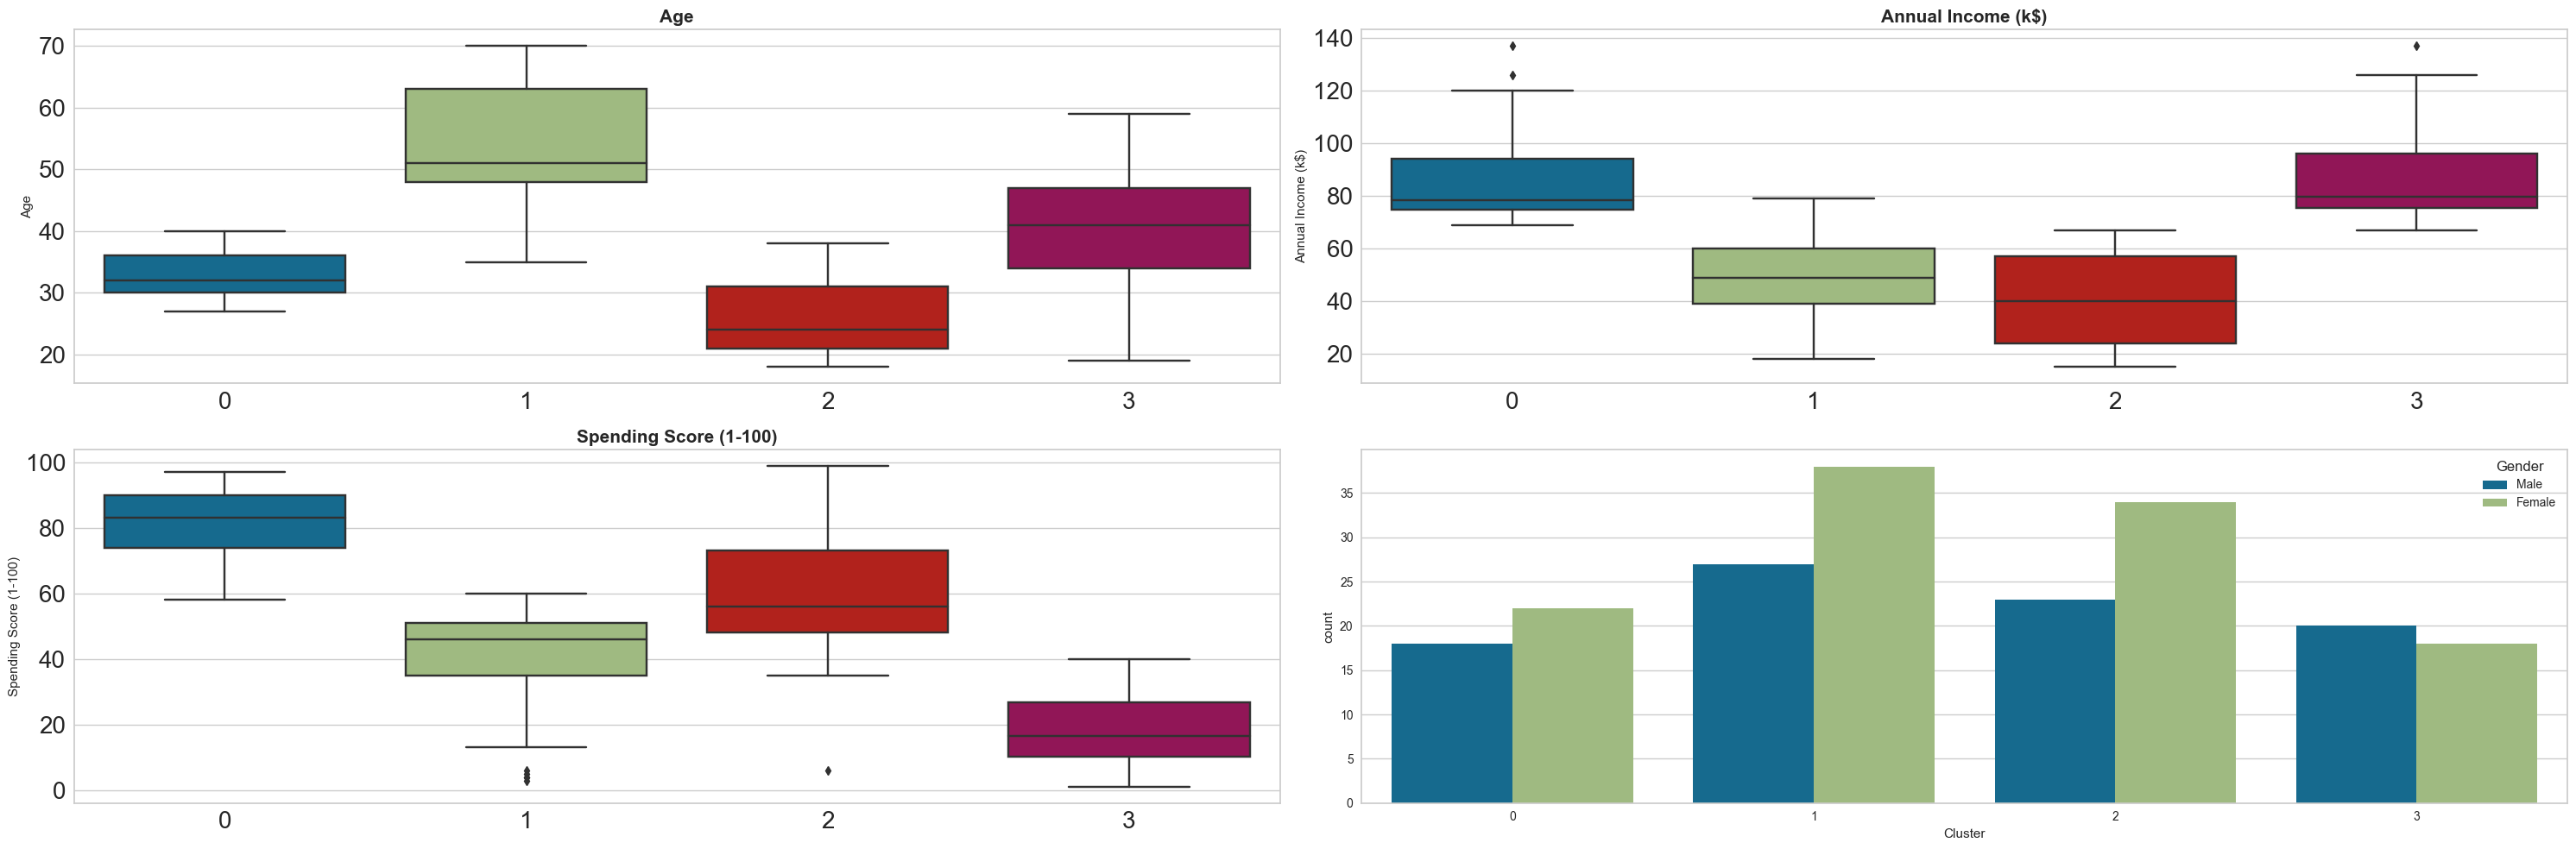

In [118]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas = df.columns.drop(["Cluster", "Gender"])

for i, colum in enumerate(columnas): 
    sns.boxplot(
        data = df,
        x = 'Cluster',
        y = colum, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

# visualizamos los clusters en relación al género
sns.countplot(x = "Cluster", hue = "Gender", data = df, ax = axes[3])

fig.tight_layout();

Vale, hasta aquí, hemos entendido en que se caracterizan cada uno de nuestros clusters. Pero... como se relacionan entre ellas las variables

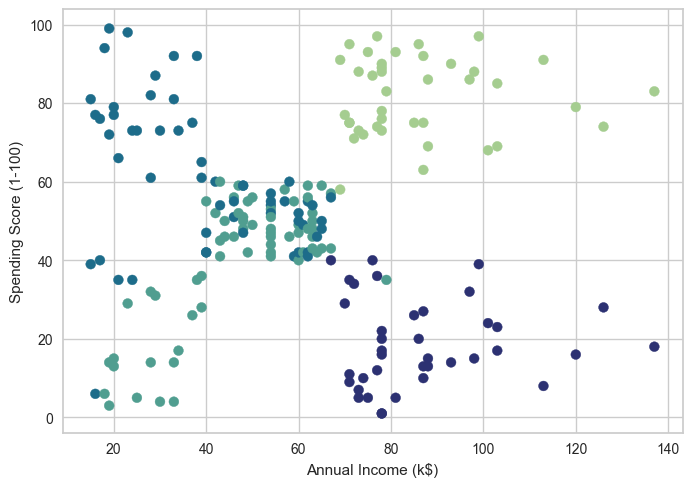

In [112]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], s=50, cmap='crest')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show();

Si quisieramos ver como se relacionan entre si todas las variables sería casi imposible, ya que no tenemos esa capacidad multidimensional. Para evitar estos problemas tenemos herramientas como el **PCA** o Análisis de Componentes Principales. Veamos como funciona

#### PCA

Un PCA es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. 


Una forma intuitiva de entender el proceso de PCA consiste en interpretar las componentes principales desde un punto de vista geométrico usando un PCA. Este es una técnica de reducción de dimensionalidad que se utiliza comúnmente en el aprendizaje automático no supervisado, como en el contexto de un problema donde se ha aplicado el algoritmo K-Means. Es importante por varias razones:

1. **Reducción de la dimensionalidad:** En muchos conjuntos de datos, especialmente aquellos con muchas características (dimensiones), puede haber redundancia de información o características irrelevantes. PCA permite reducir la dimensionalidad del conjunto de datos proyectando las características originales en un nuevo conjunto de características (los componentes principales) que capturan la mayor cantidad de varianza en los datos. Esto simplifica el problema al eliminar características menos informativas y reduce la complejidad computacional.

2. **Mejora de la visualización:** PCA puede utilizarse para visualizar datos en un espacio de menor dimensionalidad. Al proyectar los datos en un espacio bidimensional o tridimensional, por ejemplo, es más fácil representar gráficamente los clústeres y las relaciones entre puntos de datos. Esto ayuda en la interpretación y evaluación de los resultados de K-Means, ya que permite visualizar cómo los clústeres se distribuyen en el espacio reducido.

3. **Eliminación de la multicolinealidad:** En muchos casos, las características en un conjunto de datos están correlacionadas entre sí, lo que puede dificultar la interpretación de los resultados de K-Means. PCA puede ayudar a reducir la multicolinealidad al extraer componentes principales no correlacionados, lo que mejora la interpretación de los clústeres resultantes.

4. **Mejora de la eficiencia del modelo:** Al reducir la dimensionalidad de los datos, PCA puede ayudar a acelerar el rendimiento de algoritmos de aprendizaje automático, incluido K-Means. Los modelos entrenados en datos de menor dimensionalidad a menudo son más eficientes en términos de tiempo de entrenamiento y uso de recursos computacionales.

5. **Mejora de la calidad del clustering:** PCA puede ayudar a mejorar la calidad del clustering al reducir el ruido y la varianza en los datos. Al eliminar características menos informativas, K-Means puede centrarse en las características más relevantes para encontrar clústeres más significativos y coherentes.

Visualmente sería algo así:

![pca](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-19/imagenes/pca.png?raw=true)

La segunda componente (Z2) sigue la segunda dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente. La condición de no correlación entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.

![pca2](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-19/imagenes/pca2.png?raw=true)



📌 **NOTA** El proceso de PCA identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos.

In [113]:
# lo primero que vamos a hacer es añadir a el DataFrame que hemos estado usando para hacer el modelo la variable de "cluster"
df_copia["Cluster"] = labels

#iniciamos el método de PCA indicando el número de dimensiones quq queremos
pca = PCA(2)

# ajustamos el PCA
data_transformed = pd.DataFrame(pca.fit_transform(df_copia), columns=["PC1","PC2"])
data_transformed.head()

,PC1,PC2
0,0.494660,-1.476542
1,-0.652405,-1.598503
2,1.364601,-1.288540
3,-0.580244,-1.518698
4,0.575831,-0.794568


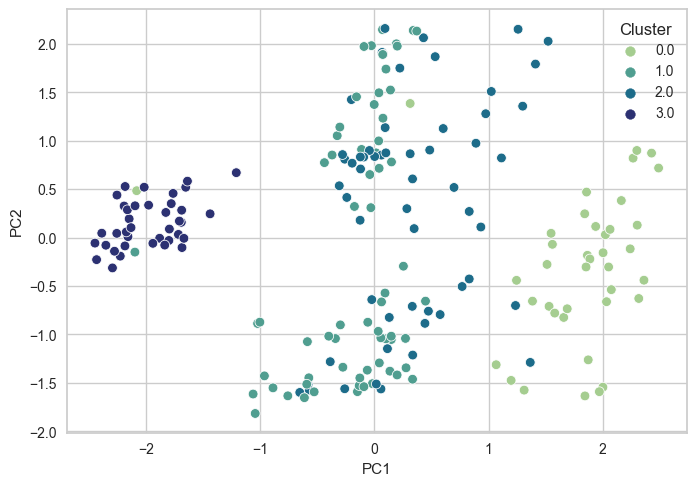

In [114]:
# veamos gráficamente los datos
pca_plot = sns.scatterplot(x = data_transformed["PC1"], y = data_transformed["PC2"], hue= df_copia["Cluster"], palette= "crest");

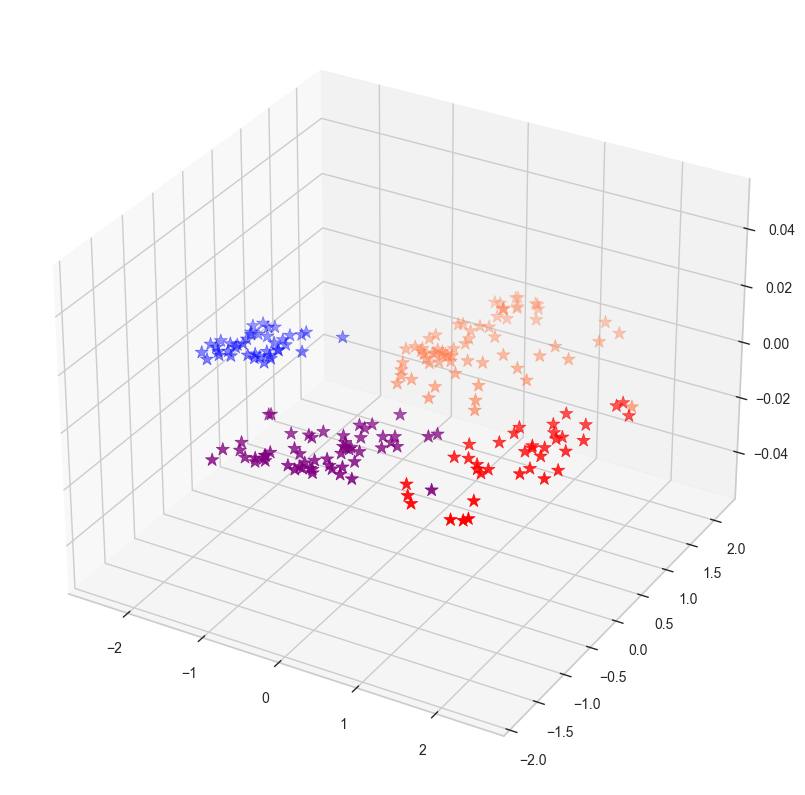

In [115]:
# pogamosnolo en tres dimensiones
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_transformed["PC1"], data_transformed["PC2"], c = col, cmap='crest', s = 100, marker = "*", linewidth=0.5);